Dataset Shape: (10, 5)

First 5 Rows:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2  Female   21                  15                      81
2           3  Female   20                  16                       6
3           4    Male   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              10 non-null     int64 
 1   Gender                  10 non-null     object
 2   Age                     10 non-null     int64 
 3   Annual Income (k$)      10 non-null     int64 
 4   Spending Score (1-100)  10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes

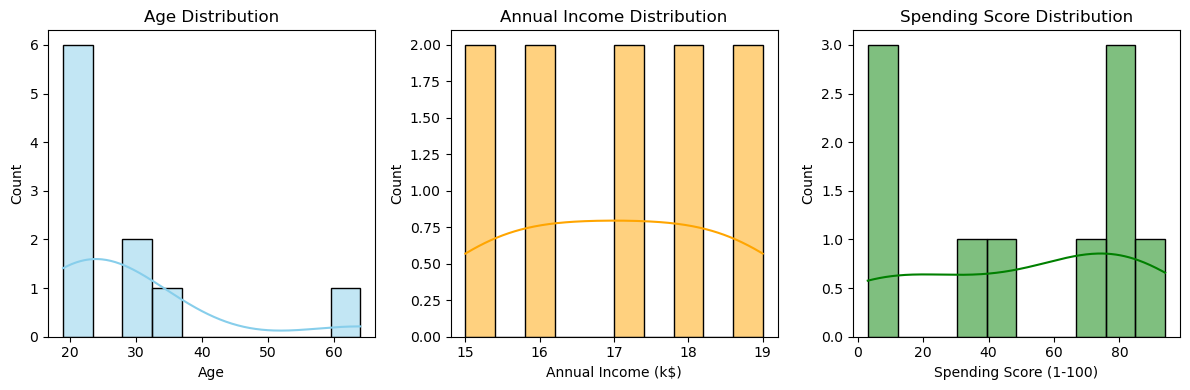

C:\Users\preethi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\preethi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\preethi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\preethi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

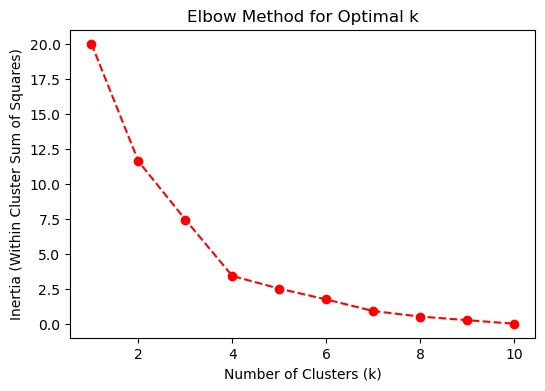

C:\Users\preethi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Clustered Data (first 5 rows):
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2  Female   21                  15                      81   
2           3  Female   20                  16                       6   
3           4    Male   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        0  
2        2  
3        0  
4        2  


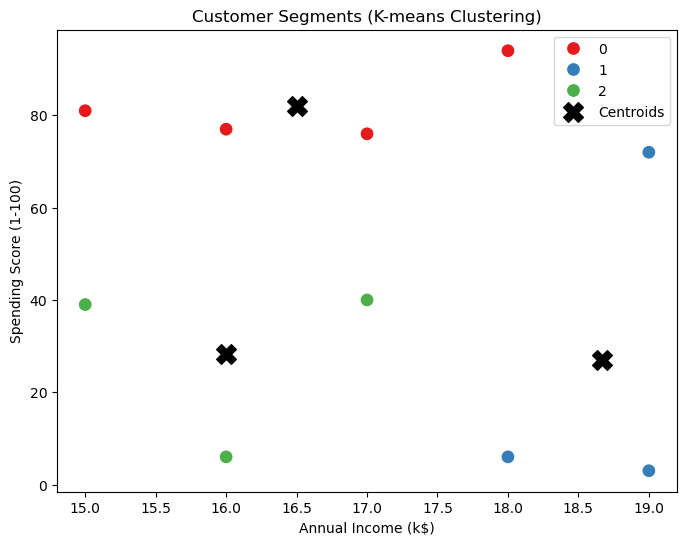

In [2]:
# ----------------------------
# 📌 Import Required Libraries
# ----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ----------------------------
# 📌 Load Dataset
# ----------------------------
df = pd.read_csv(r"C:\Users\preethi\Downloads\Mall_Customers.csv")  # ✅ use the working file

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

# ----------------------------
# 📌 EDA (Exploratory Data Analysis)
# ----------------------------
print("\nDataset Info:\n")
print(df.info())

print("\nSummary Statistics:\n")
print(df.describe())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Distributions of Age, Income, Spending Score
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.histplot(df['Age'], kde=True, bins=10, color="skyblue")
plt.title("Age Distribution")

plt.subplot(1,3,2)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=10, color="orange")
plt.title("Annual Income Distribution")

plt.subplot(1,3,3)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=10, color="green")
plt.title("Spending Score Distribution")

plt.tight_layout()
plt.show()

# ----------------------------
# 📌 Select Features for Clustering
# ----------------------------
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# 📌 Find Optimal Number of Clusters (Elbow Method)
# ----------------------------
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker='o', linestyle="--", color="red")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

# ----------------------------
# 📌 Apply K-means Clustering (k=3 chosen for sample dataset)
# ----------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster column to dataset
df['Cluster'] = y_kmeans
print("\nClustered Data (first 5 rows):\n", df.head())

# ----------------------------
# 📌 Visualize Clusters
# ----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], 
                y=df['Spending Score (1-100)'],
                hue=df['Cluster'], palette="Set1", s=100)

# Plot centroids
centers = kmeans.cluster_centers_
# Inverse transform (to original scale)
centers = scaler.inverse_transform(centers)
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, marker='X', label="Centroids")

plt.title("Customer Segments (K-means Clustering)")
plt.legend()
plt.show()
